# Boston

In [57]:
# Load pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file into DataFrame df
df_total = pd.read_csv('crime_bos.csv',  encoding = "latin1")
#df_crime = df_total[df_total['IS_CRIME']==1]

df = df_total

In [4]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


## Time

In [27]:
# Init time values

df.loc[:,"YEAR"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%Y-%m-%d %H:%M:%S").dt.year
df = df[df["YEAR"] < 2022]
df.loc[:,"MONTH"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%Y-%m-%d %H:%M:%S").dt.month
df.loc[:,"DAY"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%Y-%m-%d %H:%M:%S").dt.day
df.loc[:,"DOW"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%Y-%m-%d %H:%M:%S").dt.dayofweek
df.loc[:,"TIME"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%Y-%m-%d %H:%M:%S").dt.hour

years = [2015,2016,2017,2018]

<AxesSubplot:xlabel='YEAR'>

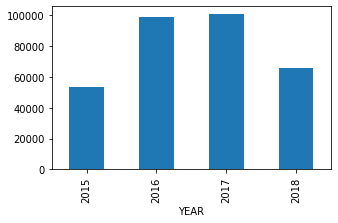

In [6]:
sums_years= df.groupby(["YEAR"])["YEAR"].count()
sums_years= sums_years.sort_index()
sums_years.plot(x="Year",kind="bar", figsize=(5,3))

<AxesSubplot:xlabel='MONTH'>

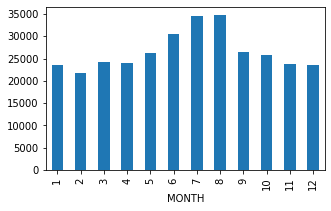

In [7]:
sums_month= df.groupby(["MONTH"])["MONTH"].count()
sums_month= sums_month.sort_index()
sums_month.plot(x="MONTH",kind="bar", figsize=(5,3))

<AxesSubplot:xlabel='DAY'>

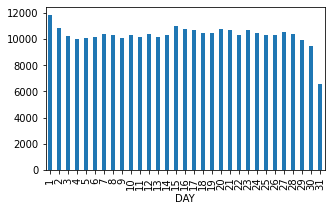

In [8]:
sums_days= df.groupby(["DAY"])["DAY"].count()
sums_days= sums_days.sort_index()
sums_days.plot(x="DAY",kind="bar", figsize=(5,3))

<AxesSubplot:xlabel='DOW'>

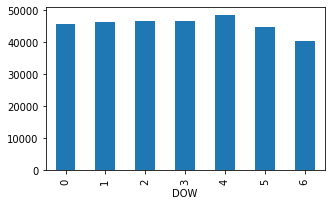

In [9]:
sums_dow= df.groupby(["DOW"])["DOW"].count()
sums_dow= sums_dow.sort_index()
sums_dow.plot(x="DAY",kind="bar", figsize=(5,3))

<AxesSubplot:xlabel='TIME'>

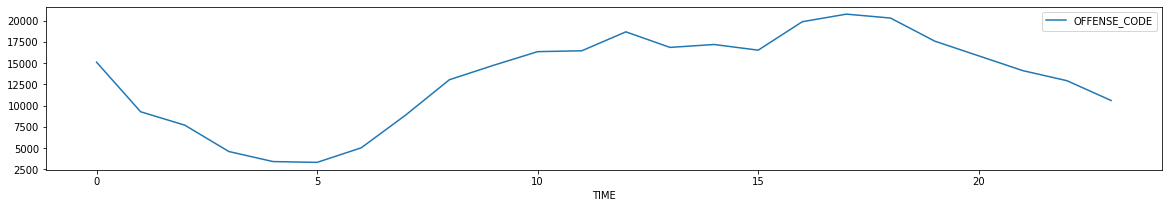

In [10]:
df_time = df[["TIME", "OFFENSE_CODE"]].groupby(["TIME"])

df_time.count().plot(kind="line",figsize=(20,3))

### Month graphs

/tmp/ipykernel_392/341281777.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_months= df.groupby(["YEAR","MONTH"])["YEAR","MONTH"].count()


YEAR  MONTH
YEAR MONTH             
2015 6      4191   4191
     7      8324   8324
     8      8342   8342
     9      8414   8414
     10     8308   8308
     11     7818   7818
     12     7991   7991
2016 1      7835   7835
     2      7308   7308
     3      8199   8199
     4      8101   8101
     5      8578   8578
     6      8558   8558
     7      8619   8619
     8      8938   8938
     9      8522   8522
     10     8583   8583
     11     7922   7922
     12     7951   7951
2017 1      7993   7993
     2      7408   7408
     3      8179   8179
     4      8069   8069
     5      8715   8715
     6      8985   8985
     7      9075   9075
     8      9206   9206
     9      8940   8940
     10     8846   8846
     11     7935   7935
     12     7535   7535
2018 1      7782   7782
     2      6937   6937
     3      7768   7768
     4      7916   7916
     5      8906   8906
     6      8834   8834
     7      8538   8538
     8      8337   8337
     9       667    667

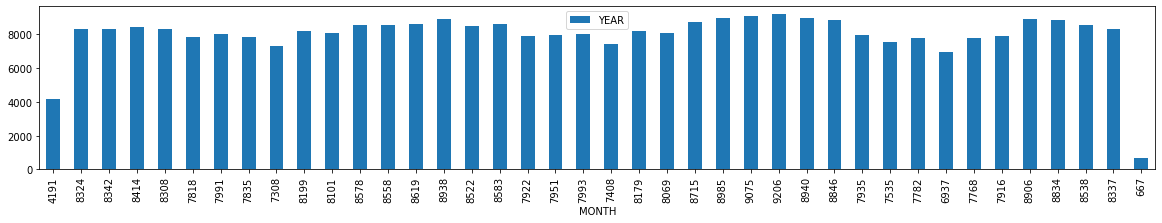

In [11]:
df_months= df.groupby(["YEAR","MONTH"])["YEAR","MONTH"].count()
df_months= df_months.sort_index()

df_months.plot(x="MONTH",kind="bar", figsize=(20,3))

df_months

YEAR     2015    2016    2017    2018
MONTH                                
1         NaN  7835.0  7993.0  7782.0
2         NaN  7308.0  7408.0  6937.0
3         NaN  8199.0  8179.0  7768.0
4         NaN  8101.0  8069.0  7916.0
5         NaN  8578.0  8715.0  8906.0
6      4191.0  8558.0  8985.0  8834.0
7      8324.0  8619.0  9075.0  8538.0
8      8342.0  8938.0  9206.0  8337.0
9      8414.0  8522.0  8940.0   667.0
10     8308.0  8583.0  8846.0     NaN
11     7818.0  7922.0  7935.0     NaN
12     7991.0  7951.0  7535.0     NaN


<AxesSubplot:xlabel='MONTH'>

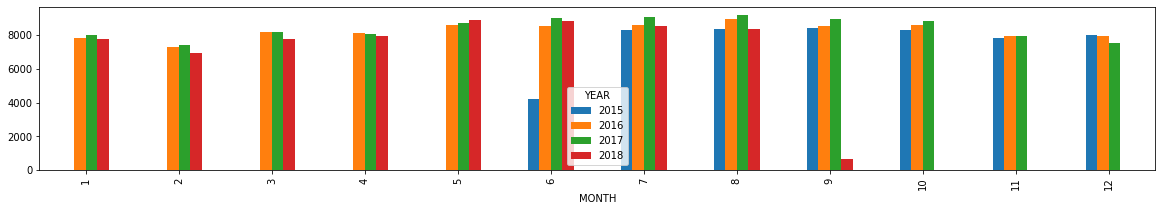

In [33]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
df_my = pd.DataFrame(data=None, columns=["YEAR", "INCIDENT_NUMBER","MONTH"])

for month in [6,7,8,9,10,11,12]:
    temp = df.loc[df['MONTH'] == month][["YEAR", "INCIDENT_NUMBER","MONTH"]]
    for year in [2015]:
        temp_year = temp.loc[temp['YEAR'] == year]
        count = temp_year.groupby(["MONTH", "YEAR"]).count()
        count = count["INCIDENT_NUMBER"].loc[count.index[0]]
        df_my.loc[len(df_my.index)] = [year, count, month]
        
for month in months:
    temp = df.loc[df['MONTH'] == month][["YEAR", "INCIDENT_NUMBER","MONTH"]]
    for year in [2016,2017]:
        temp_year = temp.loc[temp['YEAR'] == year]
        count = temp_year.groupby(["MONTH", "YEAR"]).count()
        count = count["INCIDENT_NUMBER"].loc[count.index[0]]
        df_my.loc[len(df_my.index)] = [year, count, month]
        
for month in [1,2,3,4,5,6,7,8,9]:
    temp = df.loc[df['MONTH'] == month][["YEAR", "INCIDENT_NUMBER","MONTH"]]
    for year in [2018]:
        temp_year = temp.loc[temp['YEAR'] == year]
        count = temp_year.groupby(["MONTH", "YEAR"]).count()
        count = count["INCIDENT_NUMBER"].loc[count.index[0]]
        df_my.loc[len(df_my.index)] = [year, count, month]

df_my = df_my.pivot(index='MONTH', columns='YEAR', values="INCIDENT_NUMBER")

print(df_my)

df_my.plot(kind="bar",figsize=(20,3))

### Group by offenses types

<AxesSubplot:xlabel='OFFENSE_CODE_GROUP'>

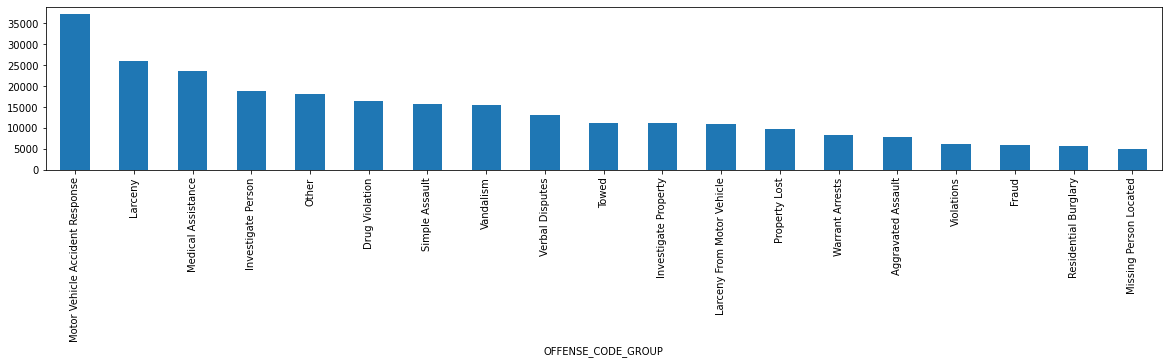

In [34]:
#df_sum_type=dataFrame = pd.DataFrame(df.head(), columns=["OFFENSE_TYPE_ID"])
#df_sum_type.plot(x="OFFENSE_TYPE_ID", kind="bar", figsize=(10, 9))

sums= df.groupby("OFFENSE_CODE_GROUP")["OFFENSE_CODE_GROUP"].count()
sums= sums.sort_values(ascending=False)[:19]
sums.plot(x="Offense type", kind="bar", figsize=(20,3))


## Group by years and  offense

Top 20 type of offenses types over the years (not year by year), and their evolution

In [35]:
# Init

top20_offenses = df.groupby(["OFFENSE_CODE_GROUP"])["OFFENSE_CODE_GROUP"].count()
top20_offenses = top20_offenses.sort_values(ascending=False)[:19]

df_offenses20 = df.loc[df['OFFENSE_CODE_GROUP'].isin(top20_offenses.keys())]



                     INCIDENT_NUMBER  year
Aggravated Assault              1386  2015
Drug Violation                  3300  2015
Fraud                            994  2015
Investigate Person              2511  2015
Investigate Property            1269  2015
...                              ...   ...
Towed                           2554  2018
Vandalism                       2814  2018
Verbal Disputes                 3055  2018
Violations                      1204  2018
Warrant Arrests                 1153  2018

[76 rows x 2 columns]


<AxesSubplot:>

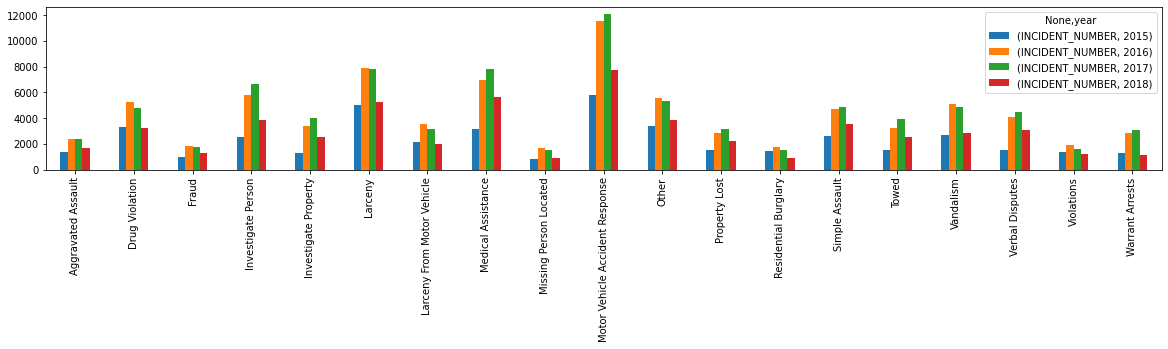

In [36]:
df_data = pd.DataFrame(data=None, columns=[ "INCIDENT_NUMBER","year"])
for i in years:
    temp = df_offenses20.loc[df_offenses20['YEAR'] == i][["OFFENSE_CODE_GROUP","YEAR", "INCIDENT_NUMBER"]].groupby(["OFFENSE_CODE_GROUP"]).count()
    temp = temp['INCIDENT_NUMBER']
    temp = pd.DataFrame(data=temp)
    temp = temp.assign(year=i)
    df_data = pd.concat([df_data,temp])

print(df_data)
df_data = df_data.pivot(columns="year")

df_data.plot.bar(figsize=(20,3))

We can notice that offenses are rising each year unless they are traffic related, which could be explained by lockdowns during the pandemic.

# Offenses by district

In [58]:
#districts = [1,2,3,4,5,6,7]

districts = np.delete(pd.unique(df["DISTRICT"]),6)

districts

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

## Offenses by district by year

<AxesSubplot:xlabel='DISTRICT,YEAR'>

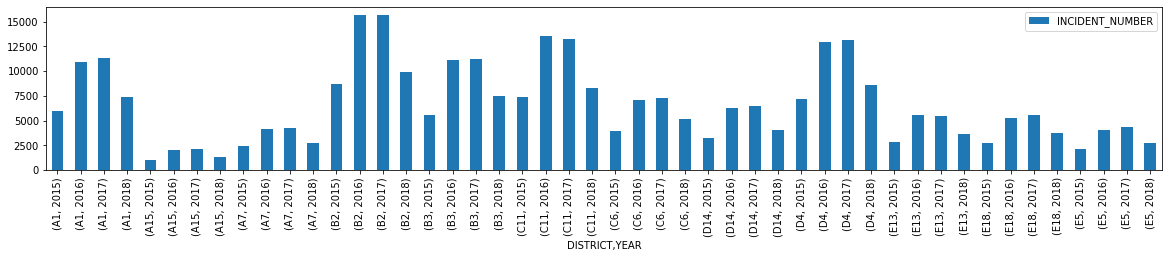

In [42]:

df_offdist = df[["YEAR", "INCIDENT_NUMBER","DISTRICT"]].groupby(["DISTRICT","YEAR"])

df_offdist.count().plot(kind="bar",figsize=(20,3))

#df_offdist.get_group((1.0, 2017)).count()

<AxesSubplot:xlabel='DISTRICT'>

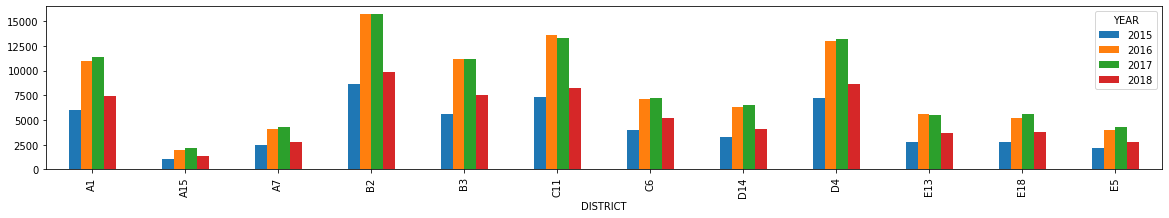

In [59]:
# work in progress

df_offdist = pd.DataFrame(data=None, columns=["YEAR", "INCIDENT_NUMBER","DISTRICT"])
for district in districts:
    temp = df.loc[df['DISTRICT'] == district][["YEAR", "INCIDENT_NUMBER","DISTRICT"]]
    
    for year in years:
        temp_year = temp.loc[temp['YEAR'] == year]
        count = temp_year.groupby(["DISTRICT", "YEAR"]).count()
        count =count["INCIDENT_NUMBER"].loc[count.index[0]]
        df_offdist.loc[len(df_offdist.index)] = [year, count, district]

df_offdist = df_offdist.pivot(index='DISTRICT', columns='YEAR', values="INCIDENT_NUMBER")

df_offdist.plot(kind="bar",figsize=(20,3))



## Offenses by district by type

<AxesSubplot:xlabel='DISTRICT,OFFENSE_CODE_GROUP'>

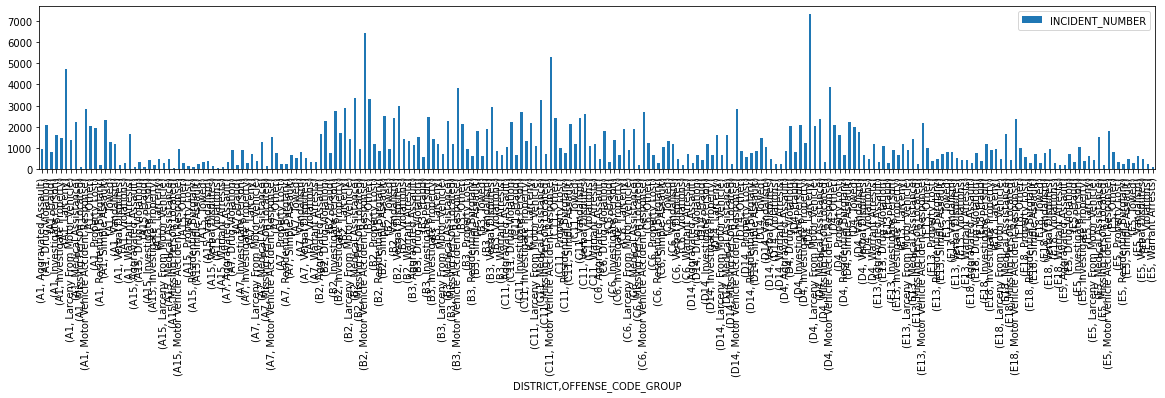

In [63]:
df_offenses20 = df.loc[df['OFFENSE_CODE_GROUP'].isin(top20_offenses.keys())]
df_offdisttype = df_offenses20[["OFFENSE_CODE_GROUP", "INCIDENT_NUMBER","DISTRICT"]].groupby(["DISTRICT","OFFENSE_CODE_GROUP"])

df_offdisttype.count().plot(kind="bar",figsize=(20,3))

## Correlations

In [62]:
df_cor = df.corr() 

df_cor

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
OFFENSE_CODE,1.000000,0.045103,-0.014322,-0.017036,-0.004569,0.003214
YEAR,0.045103,1.000000,-0.383351,0.001945,-0.015576,0.015375
MONTH,-0.014322,-0.383351,1.000000,0.002051,-0.004586,0.004695
HOUR,-0.017036,0.001945,0.002051,1.000000,0.007081,-0.007519
Lat,-0.004569,-0.015576,-0.004586,0.007081,1.000000,-0.999809
Long,0.003214,0.015375,0.004695,-0.007519,-0.999809,1.000000


There is no obvious strong correlation within the dataset

## Offenses by time of the day and type

# Notes

## Ideas

- Evolutions (y2-y1)
- Analysis by months
- Correlations

## Thesis

"Covid stay at home order impacted (temporarly) the amount of offenses in the city"
"The amount of offenses were diminishing up until the end of stay at home, then they increased"